# DESAFIO ESTÁGIO DATA ENGINEERING
### Load Data TSVs

In [57]:
import pandas as pd

# usei utf8 para corrigir a leitura dos acentos
# tsv é separado por tab
deals = pd.read_csv('deals.tsv', sep='\t',
                 encoding='utf-8')
sectors = pd.read_csv('sectors.tsv', sep='\t',
                 encoding='utf-8')
companies = pd.read_csv('companies.tsv', sep='\t',
                 encoding='utf-8')
contacts = pd.read_csv('contacts.tsv', sep='\t',
                 encoding='utf-8')

### Análise e limpeza dos dados

In [58]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null object
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [59]:
sectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
sectorKey    6 non-null int64
sector       6 non-null object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [60]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null object
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: int64(3), object(7)
memory usage: 5.9+ KB


In [61]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 contactsId              74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB


### Há um espaço em branco no metadado da primeira coluna da tabela _contacts_

In [62]:
# renomeei cada coluna para garantir que não há espaços em branco
contacts.columns = ['contactsId', 'contactsName', 'contactsDateCreated', 'contactsCreatedBy',
                    'contactsEmails', 'contactsPhones', 'contactsEmployers', 'employersId', 
                    'contactsHomeAdress', 'contactsLatLong', 'contactsRelatedToLead', 'contactsResponsible']
print(contacts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null object
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: int64(3), object(9)
memory usage: 7.0+ KB
None


### Conversão de tipos (date)

In [63]:
deals['dealsDateCreated'] = pd.to_datetime(deals['dealsDateCreated'])
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null datetime64[ns]
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 4.0 KB


In [64]:
contacts['contactsDateCreated'] = pd.to_datetime(contacts['contactsDateCreated'])
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
contactsId               74 non-null int64
contactsName             74 non-null object
contactsDateCreated      74 non-null datetime64[ns]
contactsCreatedBy        74 non-null object
contactsEmails           74 non-null object
contactsPhones           74 non-null object
contactsEmployers        74 non-null object
employersId              74 non-null int64
contactsHomeAdress       74 non-null object
contactsLatLong          74 non-null object
contactsRelatedToLead    74 non-null int64
contactsResponsible      74 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 7.0+ KB


In [65]:
companies['companiesDateCreated'] = pd.to_datetime(companies['companiesDateCreated'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
companiesId             74 non-null int64
companiesName           74 non-null object
companiesDateCreated    74 non-null datetime64[ns]
createdBy               74 non-null object
companiesEmails         74 non-null object
companiesPhones         74 non-null object
employeesId             74 non-null int64
employeesName           74 non-null object
usersResponsible        74 non-null object
sectorKey               74 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.9+ KB


### Valores inválidos

 Não é possível haver _dealsDateCreated, contactsDateCreated e companiesDateCreated_ no futuro. Então, me basendo na data que recebi o desafio '2018-10-09' para ser o fator seletivo

In [66]:
# drop de linhas inválidas em deals
deals_clean = deals[deals.dealsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em deals: {len(deals) - len(deals_clean)}')

# drop de linhas inválidas em contacts
contacts_clean = contacts[contacts.contactsDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em contacts: {len(contacts) - len(contacts_clean)}')

# drop de linhas inválidas em companies
companies_clean = companies[companies.companiesDateCreated < "2018-10-09"]
print(f'Número de linhas descartadas em companies: {len(companies) - len(companies_clean)}')

Número de linhas descartadas em deals: 45
Número de linhas descartadas em contacts: 26
Número de linhas descartadas em companies: 26


---

# OUTPUT 01: Gráficos

O primeiro OUTPUT deve conseguir servir de base para 2 gráficos: número de vendas por
contato e valor total vendido por mês.

### Join entre as tabels _deals_ e _contacts_

In [67]:
# O join vai servir para mapear o nome dos contacts
# vai auxiliar na exibição do gráfico com os nomes dos contacts

colunas_necessarias_contacts = ['contactsId','contactsName']
deals_contacts = pd.merge(deals_clean, contacts_clean[colunas_necessarias_contacts], left_on='contactsId', right_on='contactsId')
deals_contacts

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,contactsName
0,10,2018-09-08,8880,11,29,Craig Boyd
1,5,2017-11-20,5030,11,28,Craig Boyd
2,7,2017-09-02,600,11,11,Craig Boyd
3,42,2017-12-26,2560,11,11,Craig Boyd
4,18,2018-04-05,3930,30,30,Cooper Sandoval
5,24,2018-01-01,3480,15,19,Jonah Day
6,20,2017-10-09,2380,15,19,Jonah Day
7,16,2018-05-04,6330,15,19,Jonah Day
8,45,2018-02-17,8890,15,19,Jonah Day
9,33,2018-05-12,7130,15,19,Jonah Day


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla dentro do notebook
plt.rcParams['figure.figsize'] = (15, 8)

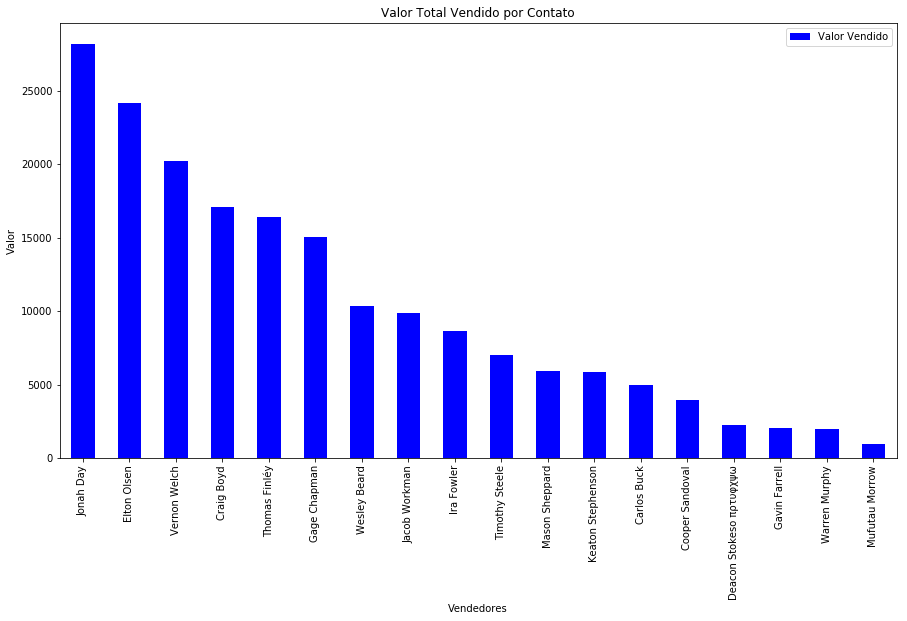

Output (Valor_total_vendido_por_contato) salvo.


In [69]:
# organização dos dados
n_vendas_contato = deals_contacts.groupby('contactsName')['dealsPrice'].sum().sort_values(ascending=False)

# visualização do gráfico
n_vendas_contato = n_vendas_contato.plot(kind='bar', color='blue', label='Valor Vendido')
plt.xlabel('Vendedores')
plt.ylabel('Valor')
plt.title("Valor Total Vendido por Contato")
plt.legend(loc="upper right")
plt.legend()
plt.show()

# salvamento da imagem
fig = n_vendas_contato.get_figure()
fig.savefig(f'Valor_total_vendido_por_contato.jpg')
print(f"Output (Valor_total_vendido_por_contato) salvo.")

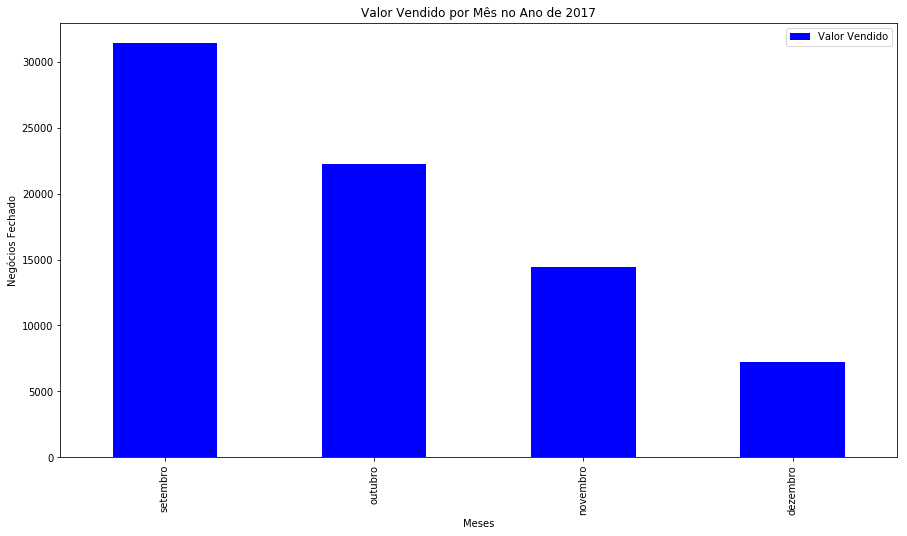

Output (Valor_total_vendido_por_mês-2017) salvo.


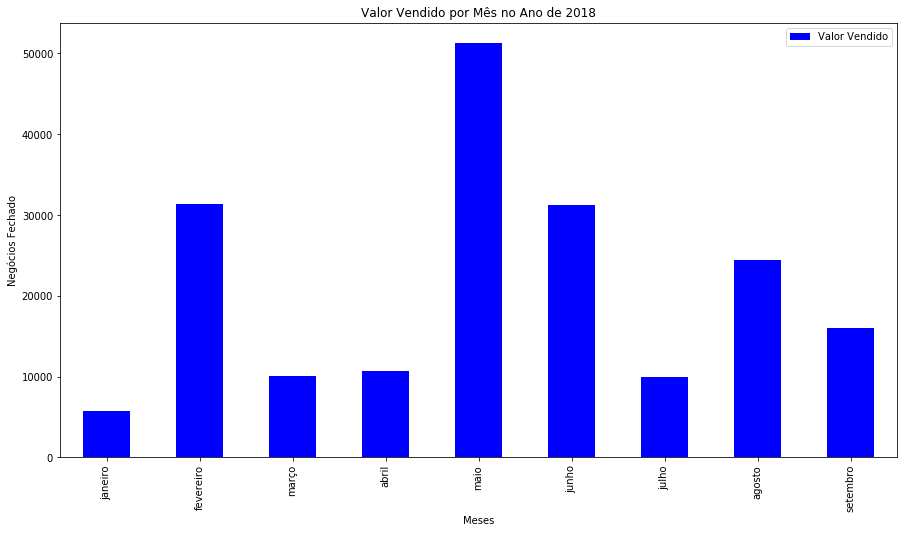

Output (Valor_total_vendido_por_mês-2018) salvo.


In [70]:
# organização dos dados: valor total vendido por mês a partir do ano
# percorre ano
for ano in range(2017,2019): 
    #print(ano)
    query_year = deals_clean[(deals_clean['dealsDateCreated'].dt.year==ano)]
    extrai_mes = pd.DatetimeIndex(query_year['dealsDateCreated']).month
    n_vendas_mes = query_year.groupby(extrai_mes)['dealsPrice'].sum()
    
    # para renomear as colunas do gráfico sera necessário renomear os índices do pandas series n_vendas_mes
    n_vendas_mes = n_vendas_mes.rename(index={1:"janeiro", 2:"fevereiro", 3:"março", 4:"abril",
            5:"maio", 6:"junho", 7:"julho", 8:"agosto", 9:"setembro", 10:"outubro", 11:"novembro", 12:"dezembro"})

    # visualização do gráfico
    n_vendas_mes_grafico = n_vendas_mes.plot(kind='bar', color='blue', label='Valor Vendido')
    plt.xlabel('Meses')
    plt.ylabel('Negócios Fechado')
    plt.title(f"Valor Vendido por Mês no Ano de {ano}")
    plt.legend(loc="upper right")
    plt.legend()
    plt.show()
    
    # salvamento da imagem
    fig = n_vendas_mes_grafico.get_figure()
    fig.savefig(f'valor_total_vendido_por_mês-{ano}.jpg')
    print(f"Output (Valor_total_vendido_por_mês-{ano}) salvo.")

---

# OUTPUT 02: Lista das vendas por setores ordenado pelo mês
O segundo output deve ser uma lista dos setores de empresa, ordenado por quanto esse setor representa no total vendido pela empresa no mês. Por exemplo, considerando que a empresa vendeu 10k total, se o 8k foi vendido para empresas do setor 1 e 2k para empresas do setor 2 então a lista resultante seria:
- 1 Bens De Consumo 0.8
- 2 Serviços 0.2

Note que o nome do setor deve constar na lista.

In [71]:
# O join vai servir para mapear o nome dos sectors
colunas_necessarias_companies = ['companiesId', 'sectorKey' ]
companies_sectors = pd.merge(companies_clean[colunas_necessarias_companies], sectors,
                             left_on='sectorKey', right_on='sectorKey')

# join entre deals e companies_sectors
deals_companies_sectors = pd.merge(deals_clean, companies_sectors,
                                   left_on='companiesId', right_on='companiesId')

# Deixar a tabela já sorted por data
deals_companies_sectors.sort_values(by=['dealsDateCreated'], ascending=False)

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId,sectorKey,sector
30,80,2018-09-16,740,55,55,4,Indústria
0,10,2018-09-08,8880,11,29,4,Indústria
13,11,2018-09-08,1450,13,13,2,Serviços
14,68,2018-09-05,4960,23,23,3,Tecnologia
11,44,2018-08-15,5930,63,63,2,Serviços
12,55,2018-08-11,8880,13,13,2,Serviços
22,83,2018-06-26,9590,3,3,6,Atacado
29,63,2018-06-20,9650,45,45,2,Serviços
15,86,2018-06-13,7010,35,35,2,Serviços
23,34,2018-05-13,6840,3,3,6,Atacado


#### OBS:
Faltou analisar a complexidade algoritma. Cada `for` faz a complexidade aumentar exponencialmente.

In [72]:
# neste dataframe vou armazenar o valor total vendido por mês, separado por setor
table_result = pd.DataFrame(columns=['Ano','Mês', 'Setor', 'Valor Total Vendido Mensal'])

# conversão das colunas Object para int
table_result.Ano = table_result.Ano.astype(int)
table_result.Mês = table_result.Ano.astype(int)
table_result.Setor = table_result.Setor.astype(int)
table_result['Valor Total Vendido Mensal'] = table_result['Valor Total Vendido Mensal'].astype(int)

# percorre ano
for ano in range(2017,2019): 
    #print(ano)
    query_year = deals_companies_sectors[(deals_companies_sectors['dealsDateCreated'].dt.year==ano)]

    # percorre mês
    for mes in range(1,13):
        #print(mes)
        query_year_month = query_year[(query_year['dealsDateCreated'].dt.month==mes)]        
        
        # percorre setor (é menos custoso comparar valores numéricos, então query_year_month['sectorKey'])
        for setor in query_year_month['sectorKey']:
            #print(setor)
            query_sector_month = query_year_month[(query_year_month['sectorKey']==setor)]
                            
            # group by dealsPrice
            grouping = query_sector_month.groupby('sector')['dealsPrice'].sum().sort_values(ascending=False)

            # variável p organizar a inserção no dataframe grouping_sector_month
            data = pd.DataFrame([[ano, mes, setor, grouping[0]]], 
                                columns=['Ano', 'Mês', 'Setor', 'Valor Total Vendido Mensal'])
            table_result = table_result.append(data)
            
            table_result = table_result.drop_duplicates(keep='first')
table_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 0
Data columns (total 4 columns):
Ano                           28 non-null int64
Mês                           28 non-null int64
Setor                         28 non-null int64
Valor Total Vendido Mensal    28 non-null int64
dtypes: int64(4)
memory usage: 1.1 KB


### Mapeamento e ordenação

In [73]:
# mapeamento do nome do setor. Aqui a tabela é bem menor e não é necessário fazer comparações
dict_setor = {1:"Bens de Consumo", 2:"Serviços", 3:"Tecnologia", 4:"Indústria", 5:"Varejo", 6:"Atacado"}
table_result['Setor'] = table_result['Setor'].map(dict_setor)

table_result = table_result.sort_values(by=['Ano', 'Mês', 'Valor Total Vendido Mensal', 'Setor'],
                                        ascending=False)
table_result

,Ano,Mês,Setor,Valor Total Vendido Mensal
0,2018,9,Indústria,9620
0,2018,9,Tecnologia,4960
0,2018,9,Serviços,1450
0,2018,8,Serviços,14810
0,2018,6,Serviços,16660
0,2018,6,Atacado,9590
0,2018,5,Indústria,13460
0,2018,5,Varejo,8680
0,2018,5,Atacado,6840
0,2018,4,Tecnologia,3930


### Salvamento do dataframe

In [74]:
table_result.to_csv('output.csv', 
                    index=False, sep=',', encoding='utf-8')
print('OUTPUT 02: Lista das vendas por setores ordenado pelo mês foi salvo no arquivo: output.csv')

OUTPUT 02: Lista das vendas por setores ordenado pelo mês foi salvo no arquivo: output.csv
